# Neural Network

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, (2, 3)] # Petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

Perceptron does not output a class probability, they only makr predictions based on hard threshold

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
tf.__version__

'2.4.1'

In [8]:
keras.__version__

'2.4.0'

# 1. Image Classifier

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [10]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [11]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [12]:
import matplotlib.pyplot as plt

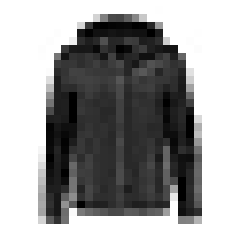

In [13]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Here are the corresponding class names:

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

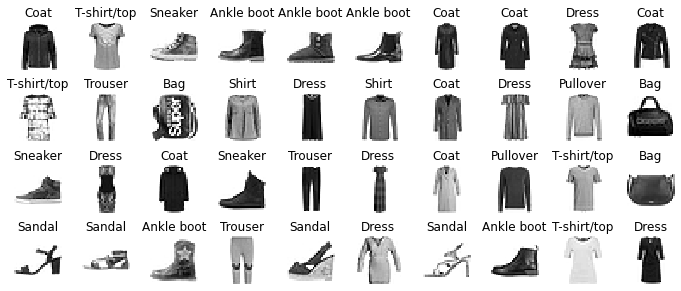

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row+col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating the Model using Sequential API

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- The first line creates a `Sequential` model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.

- The second line builds the first layer and add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. This layer does not contain any parameters, but we will need to specify input size (the shape of an input instance) with `shape=[28, 28]`.

- The third line adds a **Dense** layer with 300 neurons, that used **ReLU** activation function. Each **Dense** layer manages its own weight matrix, containing all the connection weights between neurons and inputs. It also manages a vector of bias terms (one per neuron). 

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The first hidden layer has 28x28x300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters.

In [21]:
model.layers[3].name

'dense_2'

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` method. For a **Dense** layer, this includes both the connection weights and the bias terms:

In [22]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.04181873,  0.06728329, -0.06207846, ..., -0.03230361,
        -0.05463147,  0.01553111],
       [-0.02138128, -0.00118359, -0.02757598, ..., -0.02698426,
         0.02177705, -0.00292013],
       [-0.00038784, -0.05830839, -0.06384118, ...,  0.02734109,
         0.05323733,  0.05534615],
       ...,
       [ 0.06695357,  0.05893809,  0.02887783, ...,  0.03043403,
        -0.0199509 ,  0.05634052],
       [ 0.04998983, -0.02520984,  0.04209451, ...,  0.04696402,
        -0.04810041, -0.02476488],
       [-0.03849082, -0.019275  , -0.01244703, ..., -0.03253449,
         0.01044495,  0.03222159]], dtype=float32)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Notice that the Dense layer initialized the connection weights randomly (which is
needed to break symmetry, as we discussed earlier), and the biases were just initialized
to zeros, which is fine.

## Compiling the model

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",       ## train with stochastic gradient descent
             metrics=["accuracy"])  ## Evaluate with accuracy

## Training and Evaluating the model

To train the model, we simply use the `fit()` method. We pass it the input features (X_train) and the target class (y_train), as well as the number of epochs to train. 

If we also pass a validation set, Keras will measure the loss and extra metrics n this set at the end of each epochs. This is useful to see how well the model really performs. If the performance on training set is much better than on validation set, the model is probably overfitting.

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.9909 - accuracy: 0.6902 - val_loss: 0.5215 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 2s 990us/step - loss: 0.4994 - accuracy: 0.8264 - val_loss: 0.4376 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 2s 973us/step - loss: 0.4465 - accuracy: 0.8424 - val_loss: 0.4356 - val_accuracy: 0.8476
Epoch 4/30
1719/1719 [==============================] - 2s 997us/step - loss: 0.4225 - accuracy: 0.8513 - val_loss: 0.4219 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 2s 949us/step - loss: 0.3991 - accuracy: 0.8592 - val_loss: 0.4019 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 2s 968us/step - loss: 0.3815 - accuracy: 0.8665 - val_loss: 0.3809 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 2s 974us/step - loss: 0.3677 - accuracy: 0.8699 - val_loss: 0.3840 - v

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
import pandas as pd

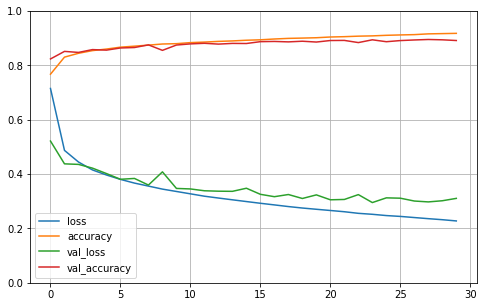

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 709us/step - loss: 0.3414 - accuracy: 0.8797


[0.3413792848587036, 0.8797000050544739]

## Making predictions

In [32]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.05, 0.  , 0.94],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = np.argmax(y_prob, axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# 2. Regression MLP with Sequential API

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

Building, training, evaluating and using a regression MLP using the Sequential API to
make predictions is quite similar to what we did for classification. The main differences
are the fact that the output layer has a single neuron (since we only want to
predict a single value) and uses no activation function, and the loss function is the
mean squared error. Since the dataset is quite noisy, we just use a single hidden layer
with fewer neurons than before, to avoid overfitting:

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0336 - val_loss: 15.9921
Epoch 2/20
363/363 [==============================] - 0s 692us/step - loss: 1.0643 - val_loss: 9.6009
Epoch 3/20
363/363 [==============================] - 0s 672us/step - loss: 0.6049 - val_loss: 0.4534
Epoch 4/20
363/363 [==============================] - 0s 677us/step - loss: 0.4093 - val_loss: 0.3639
Epoch 5/20
363/363 [==============================] - 0s 698us/step - loss: 0.3959 - val_loss: 0.3605
Epoch 6/20
363/363 [==============================] - 0s 919us/step - loss: 0.3821 - val_loss: 0.3825
Epoch 7/20
363/363 [==============================] - 0s 681us/step - loss: 0.3962 - val_loss: 0.3767
Epoch 8/20
363/363 [==============================] - 0s 682us/step - loss: 0.3806 - val_loss: 0.3864
Epoch 9/20
363/363 [==============================] - 0s 701us/step - loss: 0.3660 - val_loss: 0.4068
Epoch 10/20
363/363 [==============================] - 0s 701us/step - loss: 0.3737

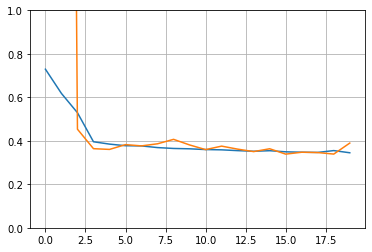

In [37]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 497us/step - loss: 0.3437


In [39]:
y_pred

array([[0.7122221],
       [1.668096 ],
       [4.128047 ]], dtype=float32)

# 3. Functional API

A Wide & Deep neural network connects all or part of the inputs directly to the output layer.

In [40]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

- First line creates `Input` object. This is needed because we may have multiple inputs

- Next, we create a `Dense` layer with 30 neurons with ReLU activation function. As soon as it is created, we can call it like a function by passing it the input (hence functional API). For now we are only telling Keras how to connect the layers together, no actual data is being processed yet. 

- We then create a second hidden layer, and again we use it as a function. Note however that we pass it the output of the first hidden layer.

- Next, we create the concatenate() layer, and use it immediately as a function and concanetate the input and output of the second layer.

- Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.

- Lastly, we create a Keras Model, specifying which inputs and outputs to use.

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [42]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.2566 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 0s 734us/step - loss: 0.6795 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 0s 734us/step - loss: 0.6284 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 0s 705us/step - loss: 0.5929 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 0s 735us/step - loss: 0.5452 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 0s 708us/step - loss: 0.5313 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 0s 710us/step - loss: 0.5207 - val_loss: 0.5889
Epoch 8/20
363/363 [==============================] - 0s 725us/step - loss: 0.4938 - val_loss: 0.4690
Epoch 9/20
363/363 [==============================] - 0s 715us/step - loss: 0.4789 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 0s 733us/step - loss: 0.4728 

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [46]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 750us/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 752us/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 750us/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 741us/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 756us/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 758us/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 805us/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 748us/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 746us/step - loss: 0.4676 

## Adding an auxiliary output for regularization

In [47]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [48]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [49]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.2165 - output_loss: 3.0213 - aux_output_loss: 4.9724 - val_loss: 1.5430 - val_output_loss: 0.9144 - val_aux_output_loss: 7.2005
Epoch 2/20
363/363 [==============================] - 0s 864us/step - loss: 1.0694 - output_loss: 0.8370 - aux_output_loss: 3.1602 - val_loss: 1.3118 - val_output_loss: 0.6824 - val_aux_output_loss: 6.9755
Epoch 3/20
363/363 [==============================] - 0s 873us/step - loss: 0.8493 - output_loss: 0.6993 - aux_output_loss: 2.1995 - val_loss: 1.2622 - val_output_loss: 0.6458 - val_aux_output_loss: 6.8096
Epoch 4/20
363/363 [==============================] - 0s 879us/step - loss: 0.7420 - output_loss: 0.6330 - aux_output_loss: 1.7228 - val_loss: 1.2022 - val_output_loss: 0.6136 - val_aux_output_loss: 6.5002
Epoch 5/20
363/363 [==============================] - 0s 898us/step - loss: 0.6819 - output_loss: 0.5849 - aux_output_loss: 1.5553 - val_loss: 1.1395 - val_output_loss: 0.5936 - 

In [50]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 655us/step - loss: 0.4822 - output_loss: 0.4278 - aux_output_loss: 0.9714


In [51]:
y_pred_main, y_pred_aux

(array([[0.3289803],
        [1.8843516],
        [3.3908253]], dtype=float32), array([[1.314278 ],
        [1.9748025],
        [2.6287577]], dtype=float32))

# 4. Subclassing API

In [61]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)   ## Handles standard args (e.g., names)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation="relu")

In [62]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                   validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.1953 - output_1_loss: 3.1220 - output_2_loss: 3.8547 - val_loss: 2.8539 - val_output_1_loss: 2.5208 - val_output_2_loss: 5.8515
Epoch 2/10
363/363 [==============================] - 0s 931us/step - loss: 1.0355 - output_1_loss: 0.8893 - output_2_loss: 2.3515 - val_loss: 1.5743 - val_output_1_loss: 1.2249 - val_output_2_loss: 4.7190
Epoch 3/10
363/363 [==============================] - 0s 873us/step - loss: 0.8118 - output_1_loss: 0.7014 - output_2_loss: 1.8051 - val_loss: 1.1348 - val_output_1_loss: 0.8106 - val_output_2_loss: 4.0528
Epoch 4/10
363/363 [==============================] - 0s 819us/step - loss: 0.7258 - output_1_loss: 0.6371 - output_2_loss: 1.5243 - val_loss: 0.9375 - val_output_1_loss: 0.6529 - val_output_2_loss: 3.4992
Epoch 5/10
363/363 [==============================] - 0s 813us/step - loss: 0.6637 - output_1_loss: 0.5831 - output_2_loss: 1.3885 - val_loss: 0.7974 - val_output_1_loss: 0.5528 

# Visualization - TensorBoard

On TesorBoard, we can 
- view learning curves during training
- compare learning curves among runs
- visualize computation graphs
- analyze training statistics
- view images generated by models

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files. Each binary data record is called a summary. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay), such as the learning curves during training.

In [77]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [78]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_04_06-16_06_07'

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [82]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 715us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 779us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 739us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 705us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 730us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 704us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 723us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 743us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 765us/step - loss: 0.4549 

## Hyperparameter tuning

### 1. `GridSearchCV`

To use GridSearchCV, we need ot wrap out Keras models in objects that mimic regular Scikit-learn regressors.

In [89]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [91]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 927us/step - loss: 1.8887 - val_loss: 10.5492
Epoch 2/100
363/363 [==============================] - 0s 668us/step - loss: 0.9724 - val_loss: 0.5672
Epoch 3/100
363/363 [==============================] - 0s 677us/step - loss: 0.5460 - val_loss: 0.4875
Epoch 4/100
363/363 [==============================] - 0s 694us/step - loss: 0.5080 - val_loss: 0.4654
Epoch 5/100
363/363 [==============================] - 0s 747us/step - loss: 0.4745 - val_loss: 0.4563
Epoch 6/100
363/363 [==============================] - 0s 676us/step - loss: 0.4489 - val_loss: 0.4691
Epoch 7/100
363/363 [==============================] - 0s 662us/step - loss: 0.4608 - val_loss: 0.4507
Epoch 8/100
363/363 [==============================] - 0s 683us/step - loss: 0.4390 - val_loss: 0.4346
Epoch 9/100
363/363 [==============================] - 0s 668us/step - loss: 0.4270 - val_loss: 0.4450
Epoch 10/100
363/363 [==============================] - 0s 689us/step - 

In [92]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 646us/step - loss: 0.3567


In [93]:
y_pred = keras_reg.predict(X_new)

In [94]:
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [104]:
param_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1, 100).tolist(),
    "learning_rate" : reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=1)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid), verbose = 0,
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
121/121 [==============================] - 0s 442us/step - loss: 0.6241


C:\Users\xf20985\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.35991357 -0.31022918 -0.38005053 -0.61059785         nan -0.34875212
 -0.38294071 -0.34546333 -0.39856624 -0.73755085]
  category=UserWarning


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000206F5551438>,
                   param_distributions={'learning_rate': [0.00042764271132082293,
                                                          0.0011392634396035245,
                                                          0.0006303239793031064,
                                                          0.021702839536996248,
                                                          0.01239829637839909,
                                                          0.0055453475162965836,
                                                          0.016597490742895512,
                                                          0.012146898667754018,
                                                          0.000708371977332...
                                                          0.003152215207254418,
                                                  

In [105]:
rnd_search_cv.best_params_

{'n_neurons': 19, 'n_hidden': 3, 'learning_rate': 0.02200788061166836}

# Exercise

Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, use early stopping, plot learning curves using TensorBoard, and so on).

In [106]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [107]:
X_train_full.shape

(60000, 28, 28)

In [108]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

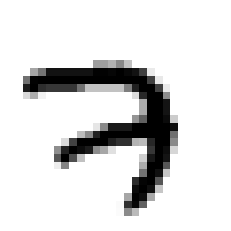

In [113]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [114]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [150]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [151]:
keras.backend.clear_session()

In [152]:
np.random.seed(42)
tf.random.set_seed(42)

In [153]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [154]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [155]:
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[expon_lr])

1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.4883 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

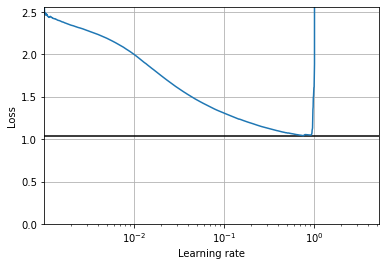

In [168]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(y = min(expon_lr.losses), xmin = min(expon_lr.rates),xmax = max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [170]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [172]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=3e-1), metrics=["accuracy"])

In [173]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [174]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [175]:
history = model.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 39s 23ms/step - loss: 0.4202 - accuracy: 0.8677 - val_loss: 0.0990 - val_accuracy: 0.9728
Epoch 2/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.1015 - val_accuracy: 0.9706
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9780 - val_loss: 0.0759 - val_accuracy: 0.9770
Epoch 4/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0686 - val_accuracy: 0.9806
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0719 - val_accuracy: 0.9830
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0856 - val

In [177]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0731 - accuracy: 0.9800


[0.0731310024857521, 0.9800000190734863]

In [ ]:
%tensorboard --logdir logs